<a href="https://colab.research.google.com/github/wooookim/ML-DL/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)   # 함수에 a_layer 매개변수로 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)   # verbose -> 훈련과정 출력, 기본값 1

In [6]:
print(history.history.keys())   # 훈련 측정값

dict_keys(['loss', 'accuracy'])


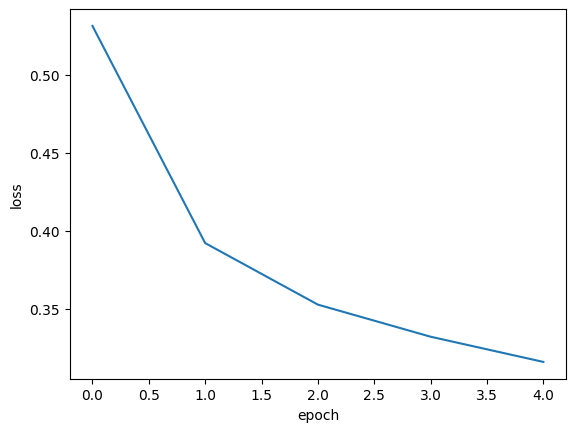

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

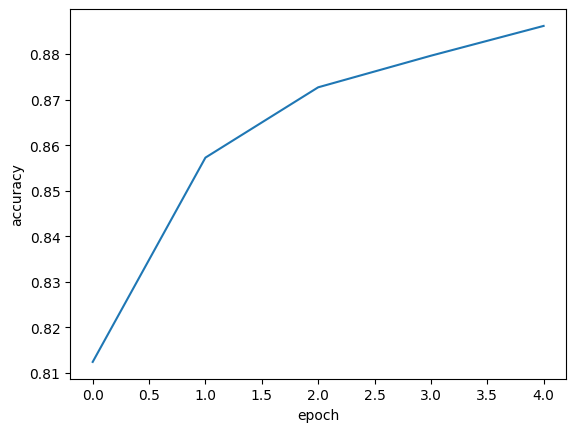

In [8]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

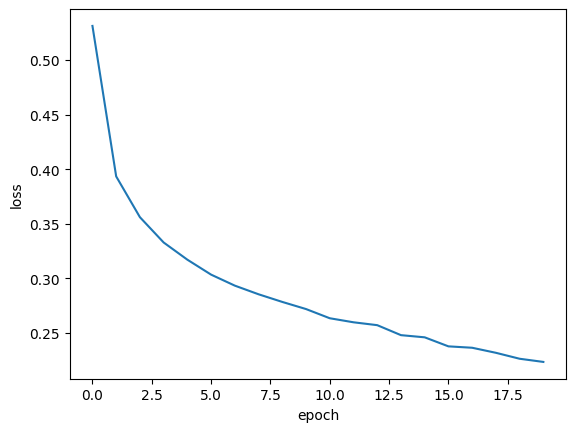

In [10]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))   # validation_data -> 검증 데이터 추가, 튜플 형식으로

In [12]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


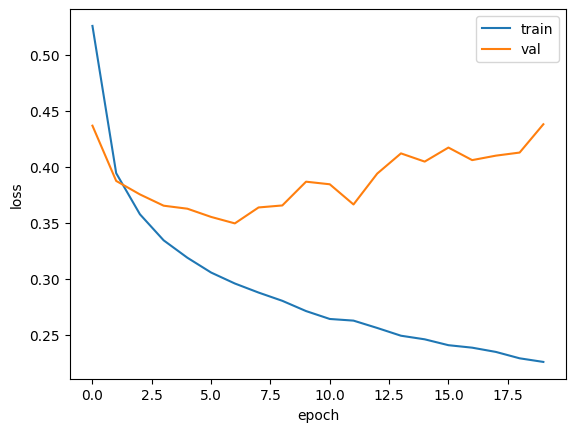

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

옵티마이저 Adam

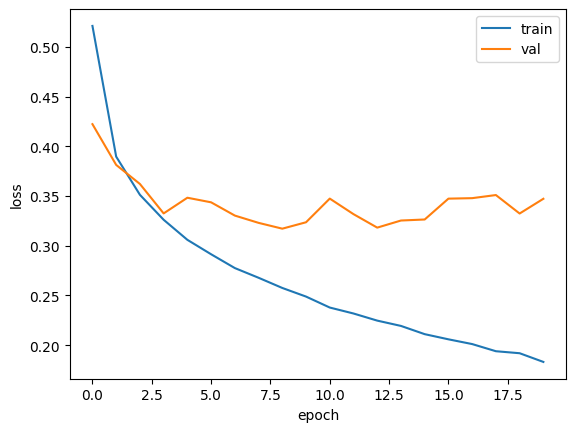

In [15]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**드롭아웃**

훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(출력을 0으로) 과대적합을 막음

이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 입력에 대해 주의

In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


일부 뉴런 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않는다

훈련이 끝나고 평가나 예측을 수행할 때는 드롭아웃을 적용하면 안됨
-> 케라스에서는 평가/예측 모델에서 드롭아웃을 적용시키지 않음

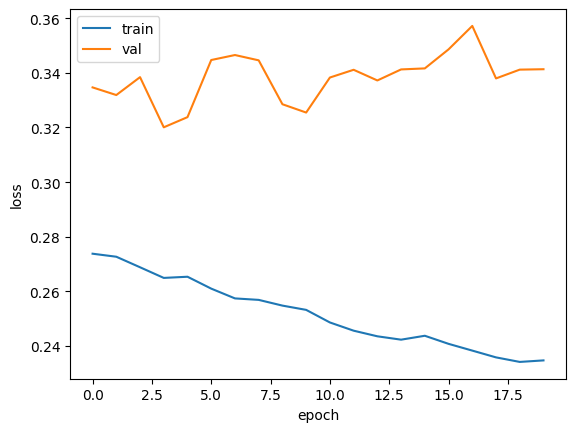

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

val loss써야 되는데 val accuracy 써놔서 그래프 보고 깜짝 놀랐다...

근데 바꿔도 이따구로 나오네

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))

In [22]:
model.save_weights('model-weights.h5')  # 체크포인트 / .h -> HDF5 확장자 / 훈련된 모델의 파라미터를 저장

In [23]:
model.save('model-whole.h5')  # 모델 구조와 모델 파라미터를 함꼐 저장

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Dec 12 07:10 model-weights.h5
-rw-r--r-- 1 root root 981176 Dec 12 07:10 model-whole.h5


In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [26]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)    # argmax -> 배열 최댓값 반환
print(np.mean(val_labels == val_target))

375/375 [==============================] - 2s 5ms/step
0.88175


In [28]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8817


[0.33469462394714355, 0.8817499876022339]

**콜백**

 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ModelCheckpoint 콜백은 기본적으로 에포크마다 모델을 저장

save_best_only = True 매개변수로 가장 낮은 검증 점수를 만드는 모델을 저장

'best-model.h5' 저장 파일 이름 지정

In [30]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3207 - accuracy: 0.8834


[0.32065266370773315, 0.8834166526794434]

**조기 종료**

과대적합이 시작되기 전 훈련을 미리 중지

훈련 에포크 횟수 제한

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_point_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


patience = 2

-> 2번 연속 검증 점수가 향상되지 않으면 훈련 중지

restore_best_weights = True

-> 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림

In [33]:
print(early_stopping_cb.stopped_epoch)

9


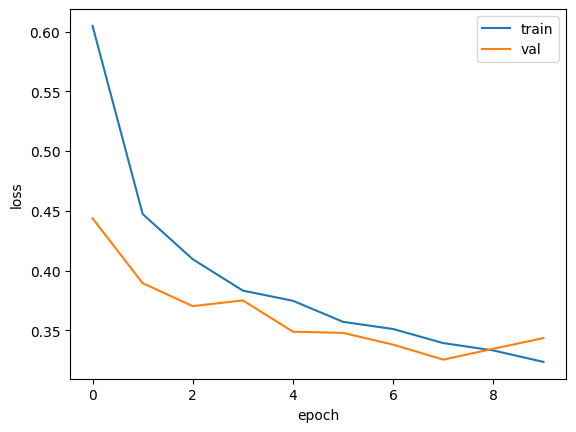

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3254 - accuracy: 0.8813


[0.32535889744758606, 0.8813333511352539]